In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "C:/Users/91933/Swiggy Folder/swiggy.csv"
df = pd.read_csv(file_path)

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB
None
                  ID        Price  Avg ratings  Total ratings  Delivery time
count    8680.000000  8680.000000  8680.000000    8680.000000    8680.000000
mean   244812.071429   348.444470     3.655104     156.634793      53.967051
std    158671.617188   230.940074     0.647629     391.448014    

In [4]:
print(df.isnull().sum())  # Check missing values
print(df[df.isna().any(axis=1)])  # Show rows with missing values

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64
Empty DataFrame
Columns: [ID, Area, City, Restaurant, Price, Avg ratings, Total ratings, Food type, Address, Delivery time]
Index: []


In [5]:
print(df.dtypes)

ID                 int64
Area              object
City              object
Restaurant        object
Price            float64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object


In [6]:
print(f"Duplicates efore removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df.duplicated().sum()}")

Duplicates efore removal: 0
Duplicates after removal: 0


### 1)What is the average price of food across all restaurants?

In [24]:
np.round(df['Price'].mean(),2)

348.44

### 2)Which restaurant has the highest average rating?

In [25]:
df.groupby("Restaurant")["Avg ratings"].mean().sort_values(ascending=False).head(1)


Restaurant
Diamond Market Pizza Jp    5.0
Name: Avg ratings, dtype: float64

### 3)Which restaurant has the lowest average rating?

In [26]:
df.groupby("Restaurant")["Avg ratings"].mean().sort_values().head(1)

Restaurant
Golden Dragon Chinese & Momo    2.0
Name: Avg ratings, dtype: float64

### 4)What is the average delivery time across all orders?

In [28]:
np.round(df["Delivery time"].mean(),2)

53.97

### 9)Are restaurants with higher prices likely to have higher ratings?

<Axes: >

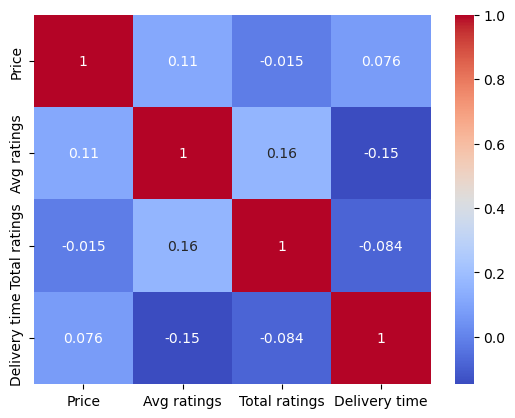

In [30]:
df3=df[["Price","Avg ratings","Total ratings","Delivery time"]]
corr=df3.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

### Are restaurants with faster delivery times more highly rated?

<Axes: >

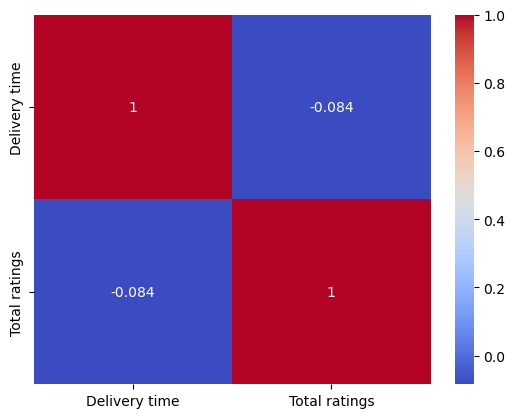

In [32]:
df4=df[["Delivery time","Total ratings"]]
corr=df4.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

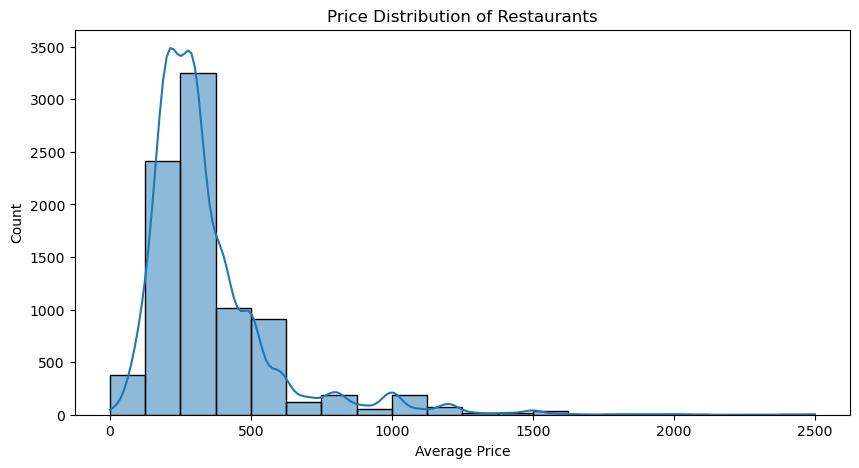

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Price Distribution of Restaurants")
plt.xlabel("Average Price")
plt.ylabel("Count")
plt.show()

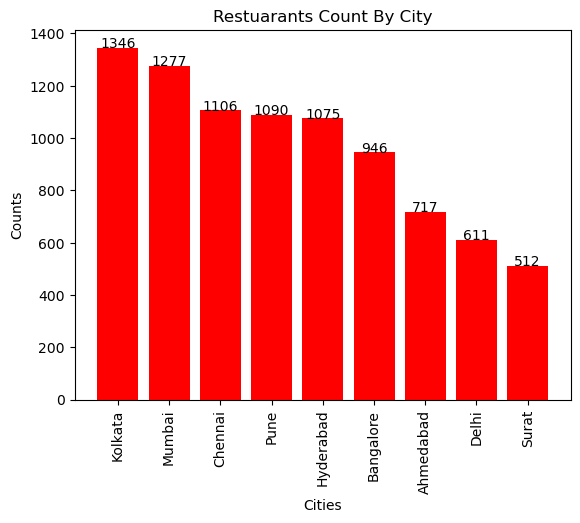

In [8]:
city = df['City'].value_counts().head(10)
plt.bar(city.index,city.values,color='red')
plt.title('Restuarants Count By City')
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Counts')

for i,v in enumerate(city.values):
    plt.text(i,v,str(v),ha='center')
plt.show()

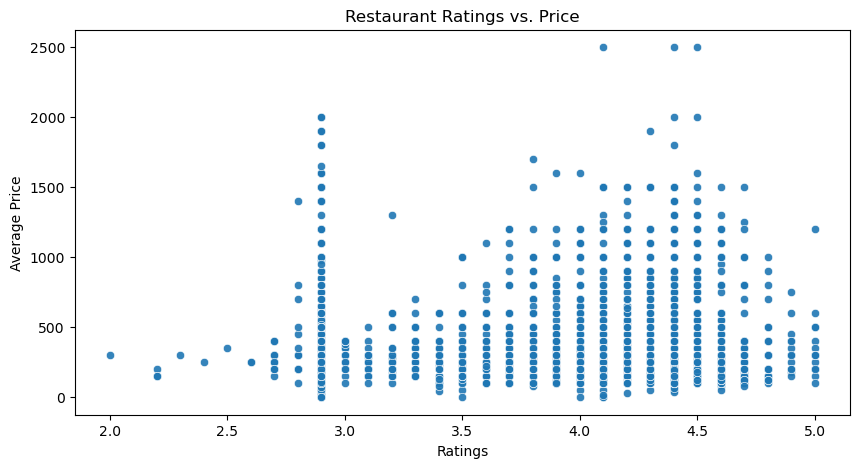

In [19]:
plt.figure(figsize=(10, 5))
sns.scatterplot(y=df['Price'], x=df['Avg ratings'], alpha=0.9)
plt.title("Restaurant Ratings vs. Price")
plt.xlabel("Ratings")
plt.ylabel("Average Price")
plt.show()

In [10]:
from collections import Counter
import itertools

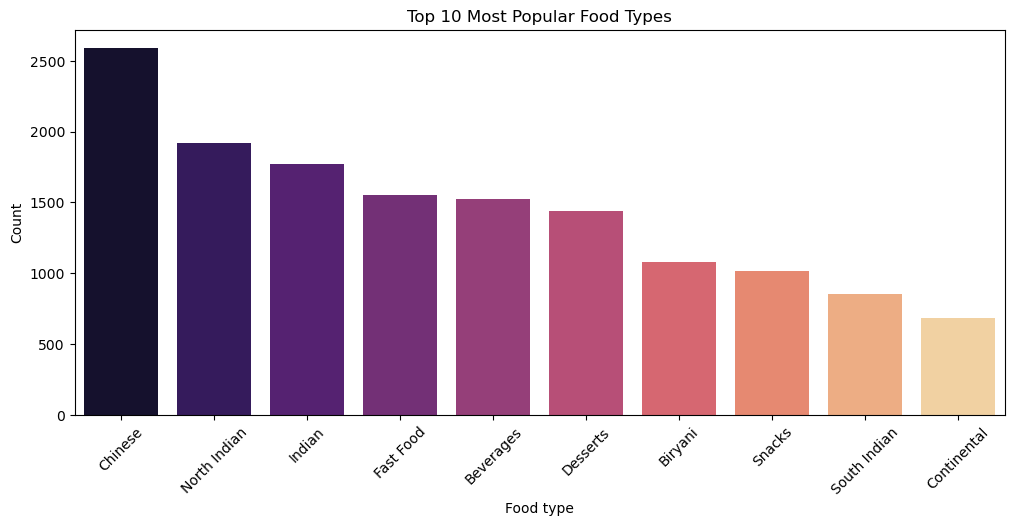

In [11]:
# Flatten food type column
food_list = list(itertools.chain(*df['Food type'].dropna().apply(lambda x: x.split(","))))
food_count = Counter(food_list)

# Convert to DataFrame for plotting
food_df = pd.DataFrame(food_count.items(), columns=['Food type', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=food_df['Food type'], y=food_df['Count'], palette="magma")
plt.title("Top 10 Most Popular Food Types")
plt.xticks(rotation=45)
plt.show()

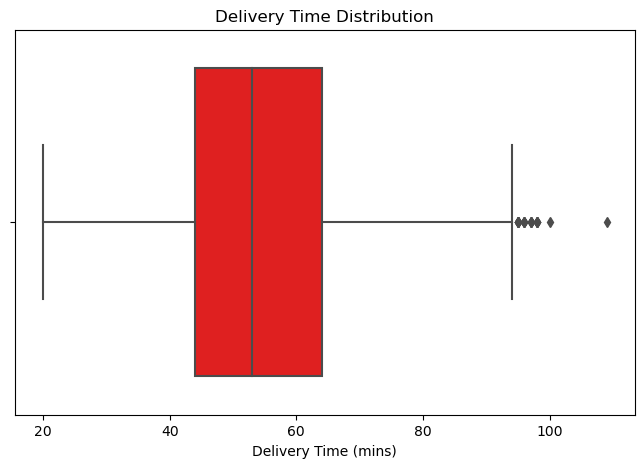

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Delivery time', color='red')
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (mins)")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


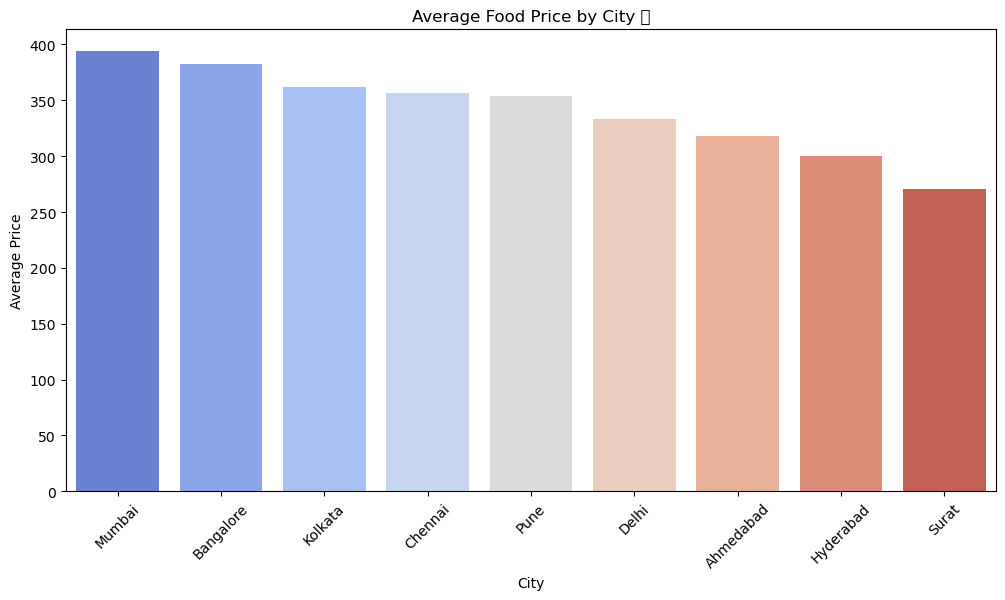

In [13]:
plt.figure(figsize=(12, 6))
city_price = df.groupby("City")["Price"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_price.index, y=city_price.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Food Price by City 🍽️")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


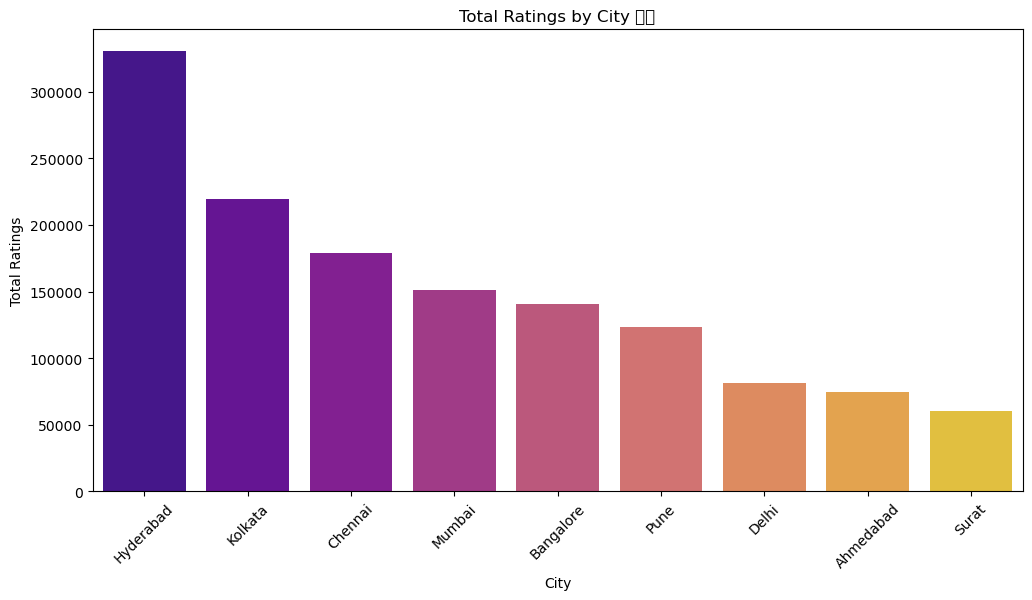

In [14]:
plt.figure(figsize=(12, 6))
city_ratings = df.groupby("City")["Total ratings"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=city_ratings.index, y=city_ratings.values, palette="plasma")
plt.xticks(rotation=45)
plt.title("Total Ratings by City 🏙️⭐")
plt.xlabel("City")
plt.ylabel("Total Ratings")
plt.show()

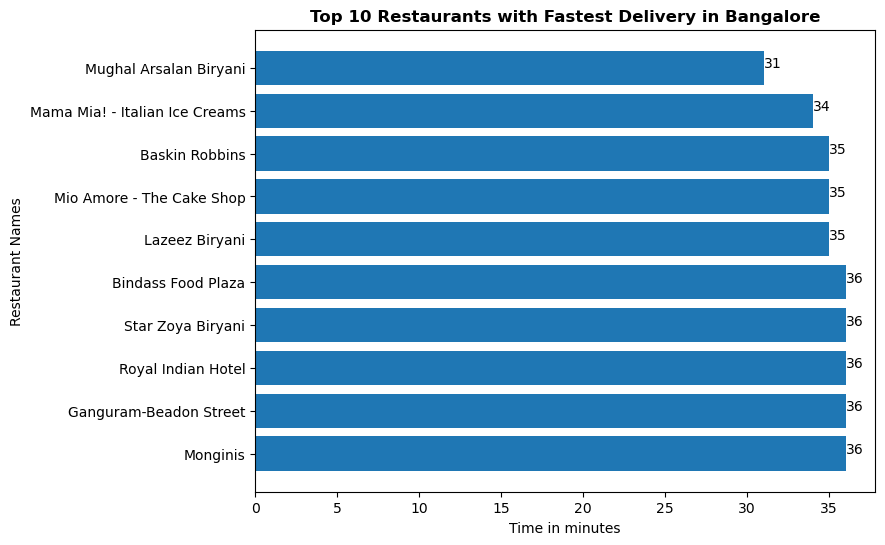

In [17]:
#Create b horizontal bar chart
a = df.City == 'Kolkata';
b = df[a]
c =b.sort_values('Delivery time').head(10)


plt.figure(figsize=(8,6))
plt.barh(c.Restaurant[::-1],c['Delivery time'][::-1])
for i,v in enumerate(c['Delivery time'][::-1]):
    plt.text(v,i,str(v))

plt.title('Top 10 Restaurants with Fastest Delivery in Bangalore',fontdict={'fontweight':'bold'})
plt.xlabel('Time in minutes')
plt.ylabel('Restaurant Names')
plt.show()

Enter your city: Bangalore


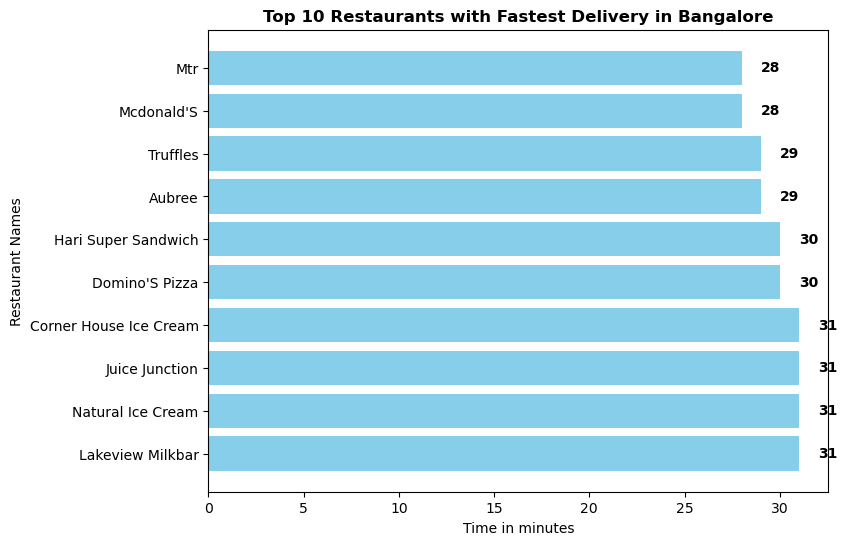

In [16]:
# Get user input for city
user_city = input('Enter your city: ').strip()

# Filter restaurants in the given city and sort by delivery time
b = df[df['City'] == user_city]
c = b.sort_values(by='Delivery time').head(10)  # Top 10 fastest restaurants

# Plot
plt.figure(figsize=(8, 6))
plt.barh(c['Restaurant'], c['Delivery time'], color="skyblue")

# Add text labels for delivery time
for i, v in enumerate(c['Delivery time']):
    plt.text(v + 1, i, str(v), va='center', fontsize=10, fontweight='bold')

plt.title(f'Top 10 Restaurants with Fastest Delivery in {user_city}', fontdict={'fontweight': 'bold'})
plt.xlabel('Time in minutes')
plt.ylabel('Restaurant Names')
plt.gca().invert_yaxis()  # Invert y-axis to show the fastest at the top
plt.show()